# Bee flight simulator
Here we use the modules stone and trialflight to test the capabilites of the physical device. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Local imports
#from context import dynamicnanobrain
# core modules
import dynamicnanobrain.core.plotter as plotter
import dynamicnanobrain.core.physics as physics
# beesim modules
import dynamicnanobrain.beesim.stone as stone
import dynamicnanobrain.beesim.trialflight as trials
import dynamicnanobrain.beesim.beeplotter as beeplotter


plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

Create network using the above method. A estimate of the storage time is given.

In [2]:
my_nw = trials.setup_network(memupdate=1.0)

The parameter Cstore=9e-16 F
The parameter Rstore=1000000.0 Ohm
Calculate tau_gate=0.9980000000000001 ns


#### Available layouts for network visualization:
**multipartite**: Standard neural network appearance. Hard to see recurrent couplings within layers.  
**circular**: Nodes drawn as a circle  
**shell**: Layers drawn as concetric circles  
**kamada_kawai**: Optimization to minimize weighted internode distance in graph  
**spring**: Force-directed layout which is standard in `networkx`


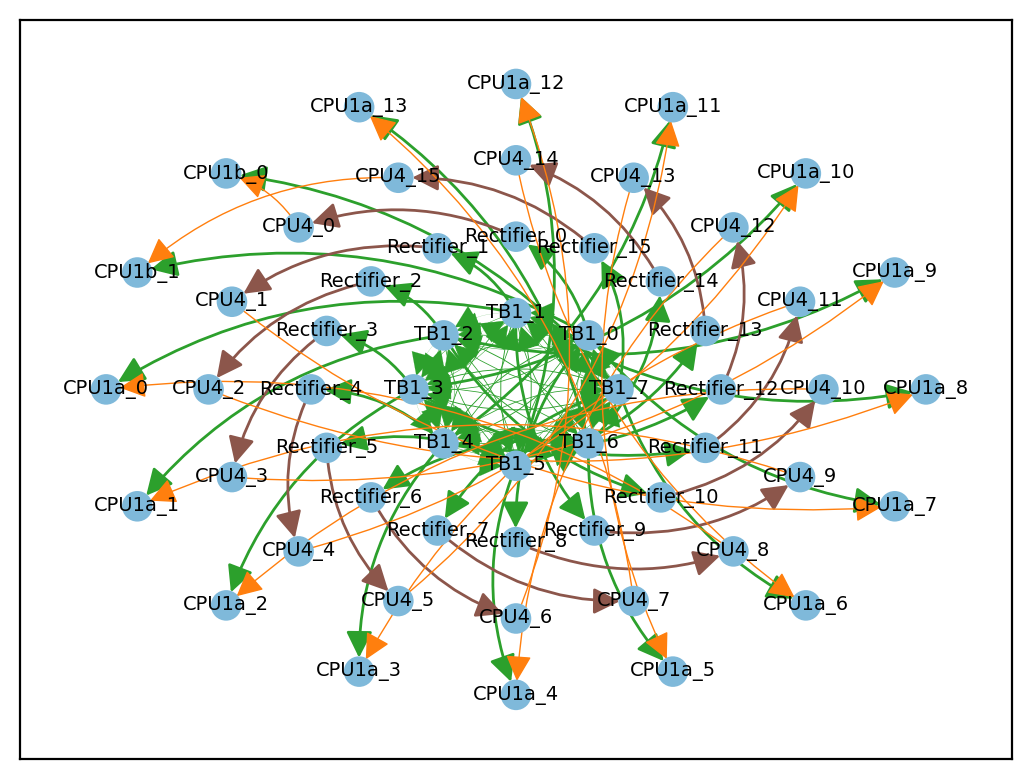

In [3]:
# Draw a shell-structure
shell_pos = my_nw.show_network(layout='shell',shell_order=('TB1','Rectifier','CPU4',['CPU1a','CPU1b']),exclude_layers=['Bias','CL1','TN2','Pontine'])

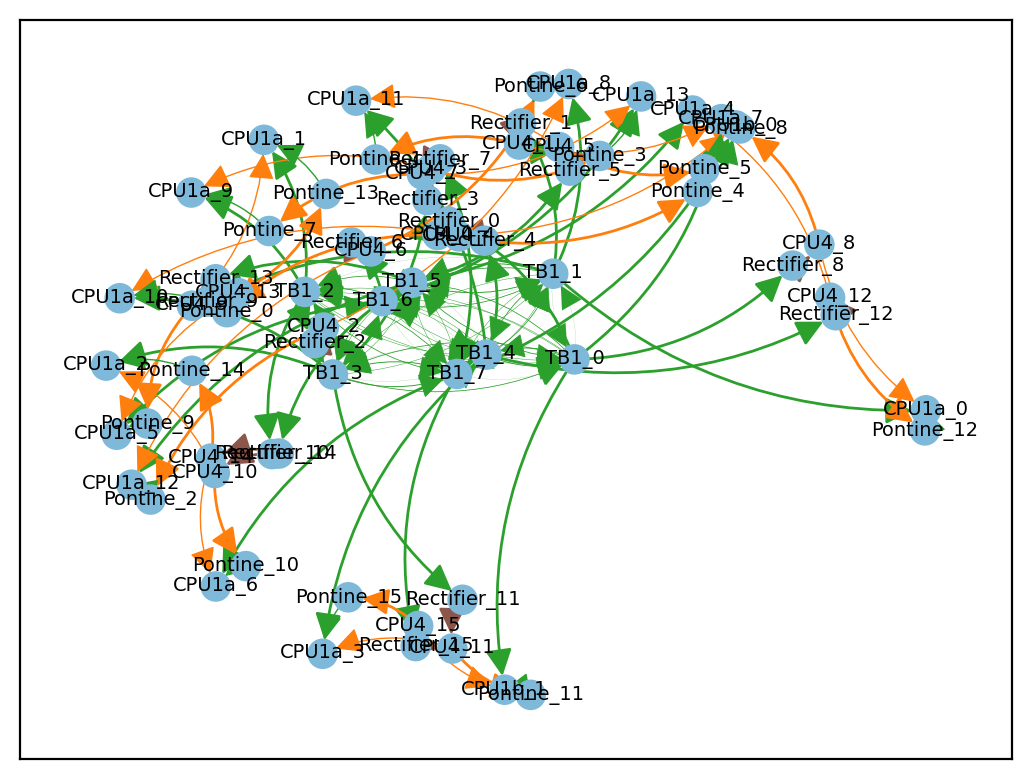

In [4]:
# Including the Pontine cells
spring_pos= my_nw.show_network(exclude_layers=['CL1','TN2','Bias'],layout='spring',k=20)

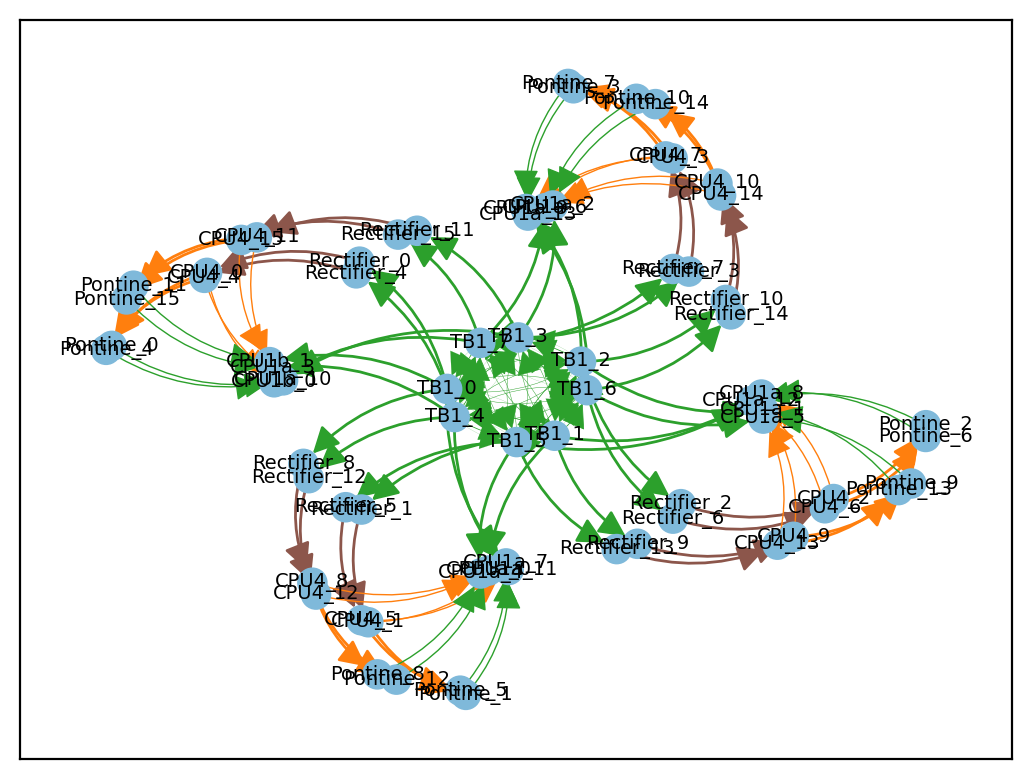

In [5]:
# Yet another version of a drawing
#kamada_pos=my_nw.show_network(exclude_layers=['CL1','TN2','Pontine'],layout='kamada_kawai')
kamada_pos=my_nw.show_network(exclude_layers=['CL1','TN2','Bias'],layout='kamada_kawai',weight=1.0,savefig=True)

In [ ]:
spring_pos= my_nw.show_network(kamada_pos,exclude_layers=['CL1','TN2'],layout='spring',k=20)

In [ ]:
fig, ax = my_nw.show_weights()

Check transistors

In [ ]:
Vleak_dict={}
my_nw.show_devices(Vleak_dict, Vstart=-0.7)

## Running the model
At this point we are all set up to do the evolution. Outbound and inbound flight are simulated after each other to test homing behavior.

In [ ]:
Tout=1000
Tinb=1000
out_res, inb_res, out_travel, inb_travel = trials.run_trial(my_nw,Tout,Tinb)

## Analyze the result
First, check the closest position to the nest for the inbound flight. Then make a few plots to illustrate the process.

In [ ]:
min_dist, _, search_width, _ = trials.analyze_inbound(inb_travel,Tout,Tinb)

In [ ]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning) # get rid of some red text...

plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# 1. Combined trace plot
comb_res = pd.concat([out_res,inb_res],ignore_index=True)
fig,_ = beeplotter.plot_traces(comb_res, layers=['CL1','TB1','TN2','CPU4','Pontine','CPU1'],attr='Pout',titles=True)

In [ ]:
# Plot the combined traveled route
fig, ax = plt.subplots()
out_travel.plot(x='x',y='y',style='purple',ax=ax,linewidth=0.5, label='Outbound')
inb_travel.plot(x='x',y='y',style='g',ax=ax,linewidth=0.5, label='Inbound')
#path_plotter.plot_route(headings, velocity, Tout, 0,ax=ax)
ax.set_title(f'Closest dist: {min_dist:.1f}, search width: {search_width:.1f}')
ax.annotate('N',(0,0),fontstyle='oblique',fontsize=14)

In [ ]:
# Specific nodes can be especially studied. 
# When plotting in a notebook, use the onecolumn flag as below.
TB1_list = [f'TB1_{idx}' for idx in range(0,8)]
plotter.plot_nodes(out_res, nodes=TB1_list, onecolumn=True)
#CPU4_list = [f'CPU4_{idx}' for idx in range(0,16)]
#plotter.plot_nodes(out_res, nodes=CPU4_list)

# Plot the heading and motor and velocity
#inb_travel.plot(x='Time',y=['heading','motor'],style='-o')
#inb_travel.plot(x='Time',y=['vx','vy'])